In [1]:
from plot import *

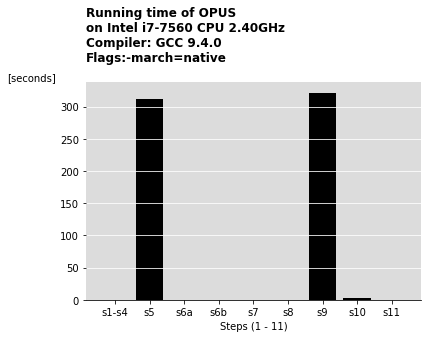

In [4]:
plot_total('../output/baseline.txt', save=True, save_dir = './output_baseline_solver_d4.eps')

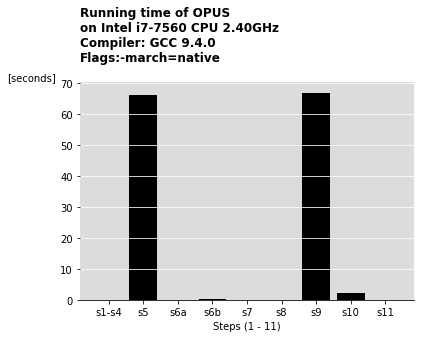

In [5]:
plot_total('../output/optimized.txt', save=True, save_dir = './output_block_opt_eval_opt_d4.txt.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


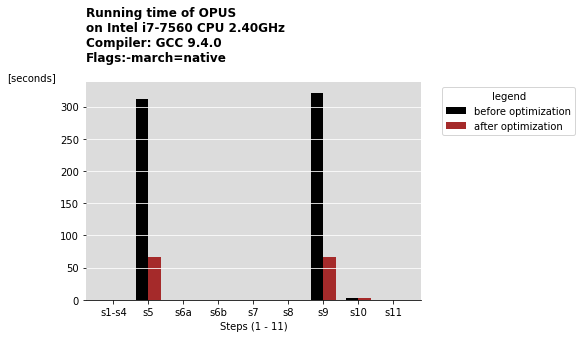

In [ ]:
plot_two_total('../output/baseline.txt', '../output/optimized.txt', save=True, save_dir = './baseline_optimized_compare.eps')

<Figure size 3200x2240 with 0 Axes>

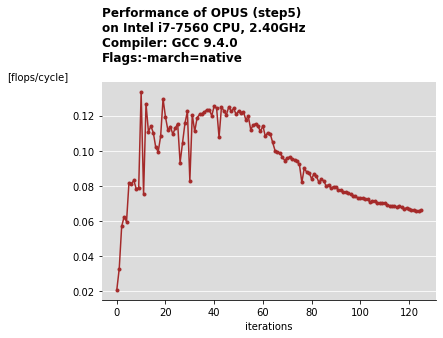

In [ ]:
plot_step_performance('../output/optimized_solver_d4.txt', '5',save=True, save_dir = './baseline_step5.eps')

<Figure size 3200x2240 with 0 Axes>

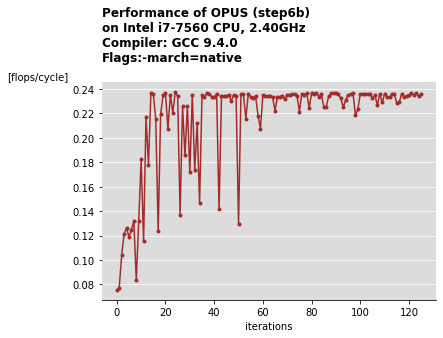

In [ ]:
plot_step_performance('../output/baseline_solver_d4.txt', '6b',save=True, save_dir = './output_baseline_step6b.eps')

<Figure size 3200x2240 with 0 Axes>

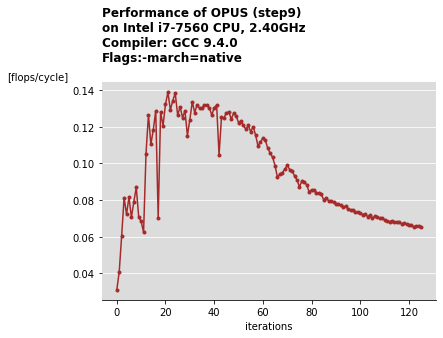

In [ ]:
plot_step_performance('../output/baseline_solver_d4.txt', '9',save=True, save_dir = './output_baseline_step9.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

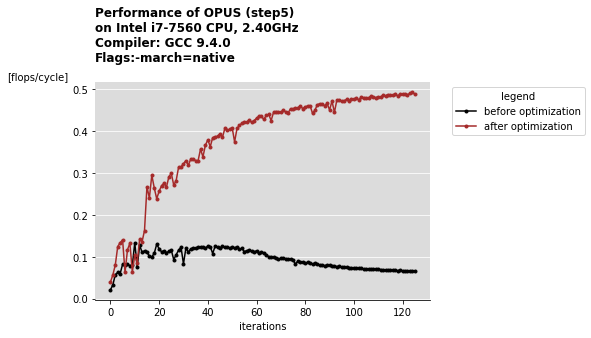

In [ ]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '5', save=True, save_dir = './output_5.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

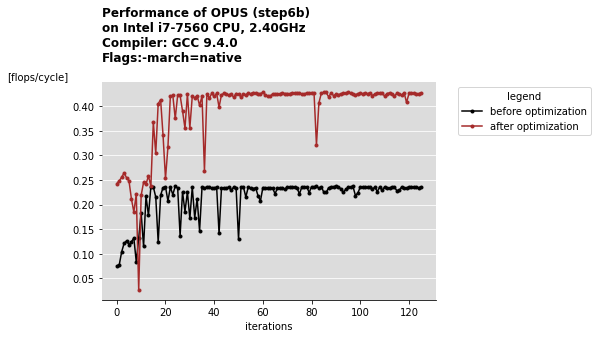

In [ ]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '6b', save=True, save_dir = './output_6b.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

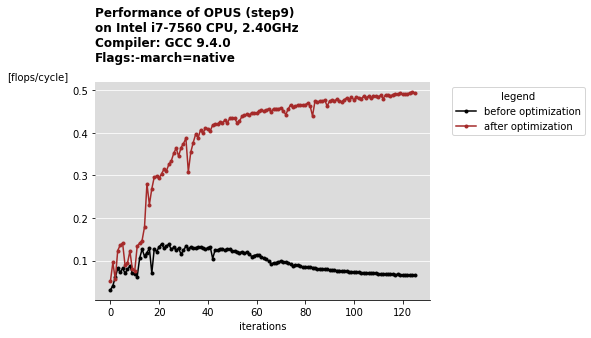

In [ ]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '9', save=True, save_dir = './output_9.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3200x2240 with 0 Axes>

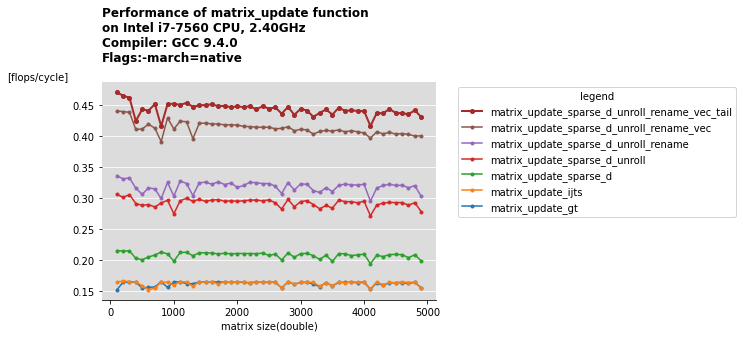

In [ ]:
plot_step_performances("../output/matrix_update.txt", "matrix_update", "matrix size(double)", save=True, save_dir = './output_matrix_update.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3200x2240 with 0 Axes>

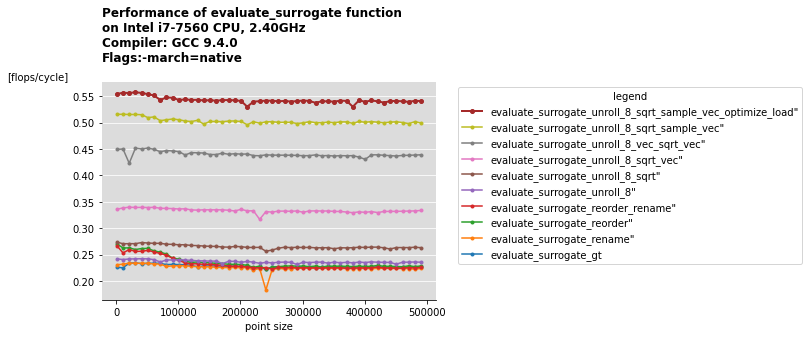

In [ ]:
plot_step_performances("../output/eval_surr.txt", "evaluate_surrogate", "point size",  save=True, save_dir = './output_eval_surr.eps')

<Figure size 3200x2240 with 0 Axes>

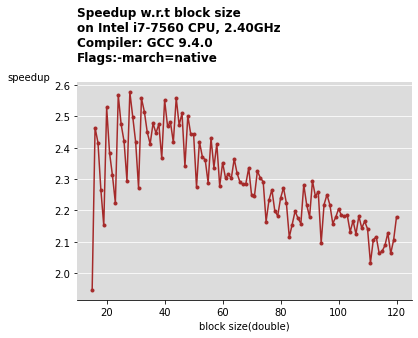

In [ ]:
plot_blocksize_speedup('../output/blocksize_speedup.txt', save=True, save_dir = './output_baseline_solver_d4.eps')

<Figure size 3200x2240 with 0 Axes>

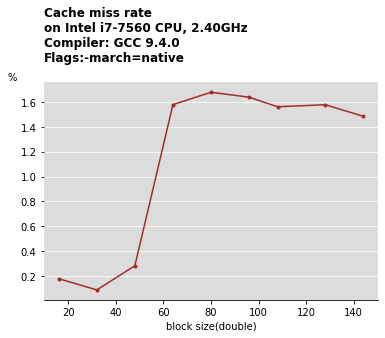

In [ ]:
# block_size, cache_access, cache_miss
plot_blocksize_missrate("../output/blocksize_cahchemiss.txt", save = True, save_dir = './output_cache_miss.eps')

<Figure size 3200x2240 with 0 Axes>

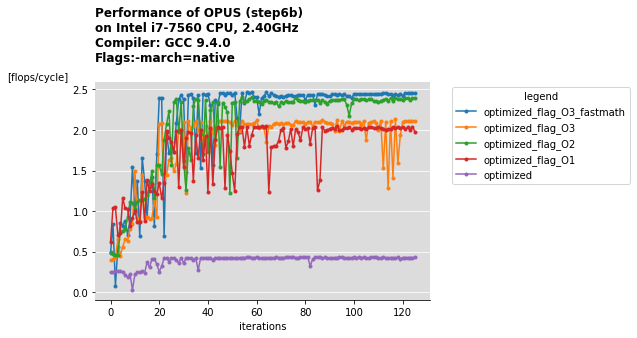

In [ ]:
plot_multiple_step_performance(['optimized_flag_O3_fastmath', 'optimized_flag_O3', 'optimized_flag_O2', 'optimized_flag_O1', 'optimized'], '6b')

<Figure size 3200x2240 with 0 Axes>

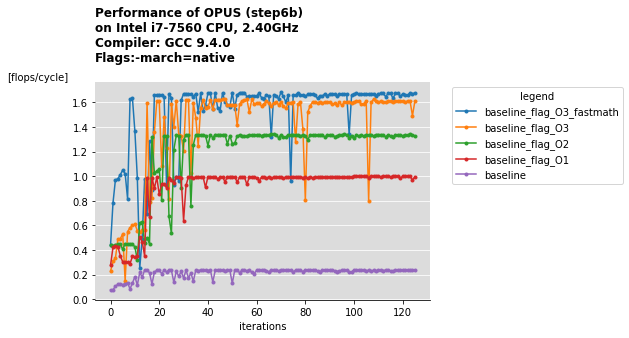

In [ ]:
plot_multiple_step_performance(['baseline_flag_O3_fastmath', 'baseline_flag_O3', 'baseline_flag_O2', 'baseline_flag_O1', 'baseline'], '6b')

<Figure size 3200x2240 with 0 Axes>

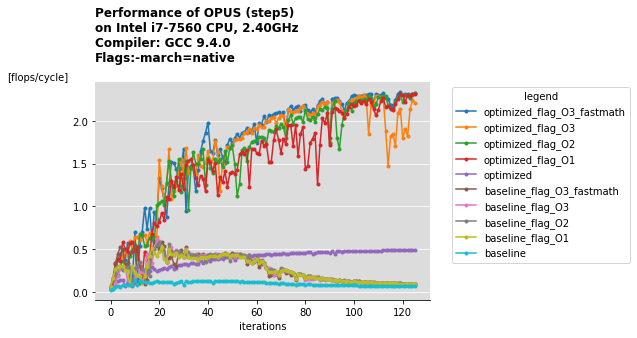

In [ ]:
plot_multiple_step_performance(['optimized_flag_O3_fastmath', 'optimized_flag_O3', 'optimized_flag_O2', 'optimized_flag_O1', 'optimized', 'baseline_flag_O3_fastmath', 'baseline_flag_O3', 'baseline_flag_O2', 'baseline_flag_O1', 'baseline'], '5')

<Figure size 3200x2240 with 0 Axes>

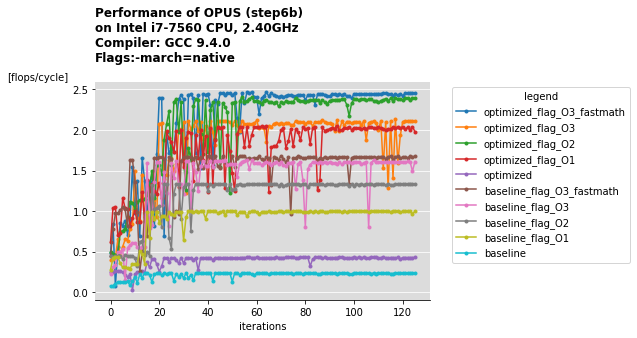

In [ ]:
plot_multiple_step_performance(['optimized_flag_O3_fastmath', 'optimized_flag_O3', 'optimized_flag_O2', 'optimized_flag_O1', 'optimized', 'baseline_flag_O3_fastmath', 'baseline_flag_O3', 'baseline_flag_O2', 'baseline_flag_O1', 'baseline'], '6b')

<Figure size 3200x2240 with 0 Axes>

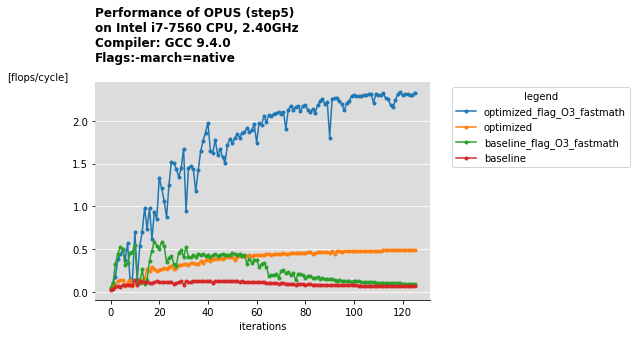

In [ ]:
plot_multiple_step_performance(['optimized_flag_O3_fastmath', 'optimized', 'baseline_flag_O3_fastmath', 'baseline'], '5')